# 16 — Advanced Customization (rcParams, styles, themes)

## Goal
Make **professional-looking plots** by controlling global defaults, reusable themes, and style sheets.

### What you'll learn
- Using Matplotlib style sheets (`plt.style.use`)
- Editing `rcParams` safely and temporarily
- Creating a reusable theme function
- Typography defaults (fonts, sizes)
- Export settings for reports and papers

---

> Tip: Prefer small, consistent defaults (fonts, grid alpha, line widths) instead of styling each plot manually.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

%matplotlib inline
np.random.seed(42)
print('Matplotlib:', mpl.__version__)
print('✅ Setup complete')

Matplotlib: 3.10.0
✅ Setup complete


## 1. Built-in Style Sheets

Matplotlib ships with built-in styles. List them and apply one:

```python
plt.style.available
plt.style.use('seaborn-v0_8')
```

### Commonly useful
- `default` (reset)
- `seaborn-v0_8` (clean and readable)
- `ggplot` (strong grid aesthetic)
- `bmh` (good for quick analysis)


In [2]:
print('=== AVAILABLE STYLES (first 15) ===')
styles = plt.style.available
print(styles[:15])
print('Total styles:', len(styles))

=== AVAILABLE STYLES (first 15) ===
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind']
Total styles: 29


## 2. rcParams (Global Defaults)

`rcParams` control default appearance for all plots.

### Safe patterns
```python
# Temporary changes
with plt.rc_context({'axes.titlesize': 16, 'axes.grid': True}):
    ...

# Permanent changes in current session
plt.rcParams['axes.grid'] = True
```

### Good professional defaults
- Use subtle grid: `grid.alpha ~ 0.25–0.35`
- Slightly thicker lines: `lines.linewidth ~ 2`
- Readable fonts: 11–13 for reports
- White background for print


=== BEFORE/AFTER rc_context DEMO ===


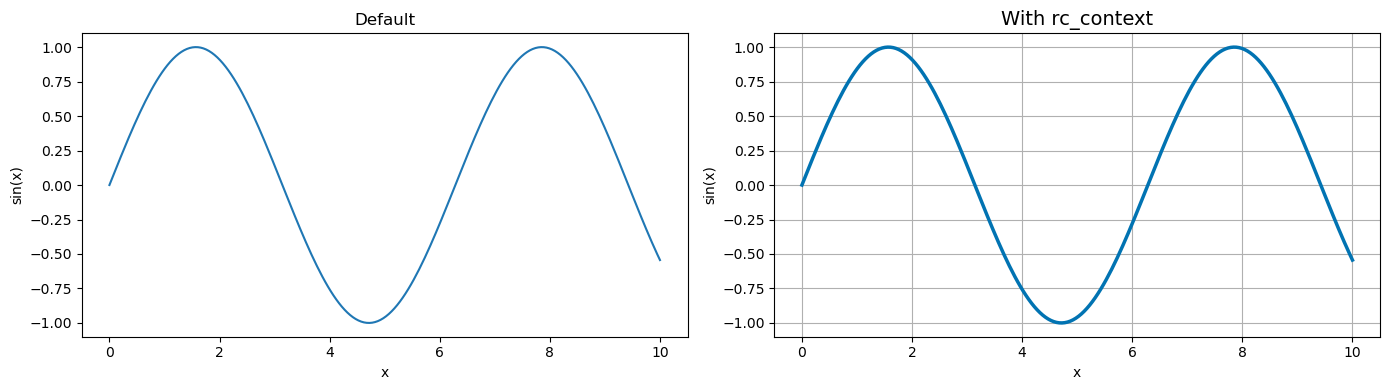

In [3]:
print('=== BEFORE/AFTER rc_context DEMO ===')
x = np.linspace(0, 10, 200)
y = np.sin(x)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].plot(x, y)
axes[0].set_title('Default')
axes[0].set_xlabel('x'); axes[0].set_ylabel('sin(x)')

with plt.rc_context({
    'axes.grid': True,
    'grid.alpha': 0.3,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'lines.linewidth': 2.5,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11
}):
    axes[1].plot(x, y, color='#0173B2')
    axes[1].set_title('With rc_context')
    axes[1].set_xlabel('x'); axes[1].set_ylabel('sin(x)')
    axes[1].grid(True)

plt.tight_layout()
plt.show()

## 3. Build a Reusable Theme Function

A theme function gives you consistent plots across notebooks/projects.

```python
def set_theme():
    plt.rcParams.update({...})
```


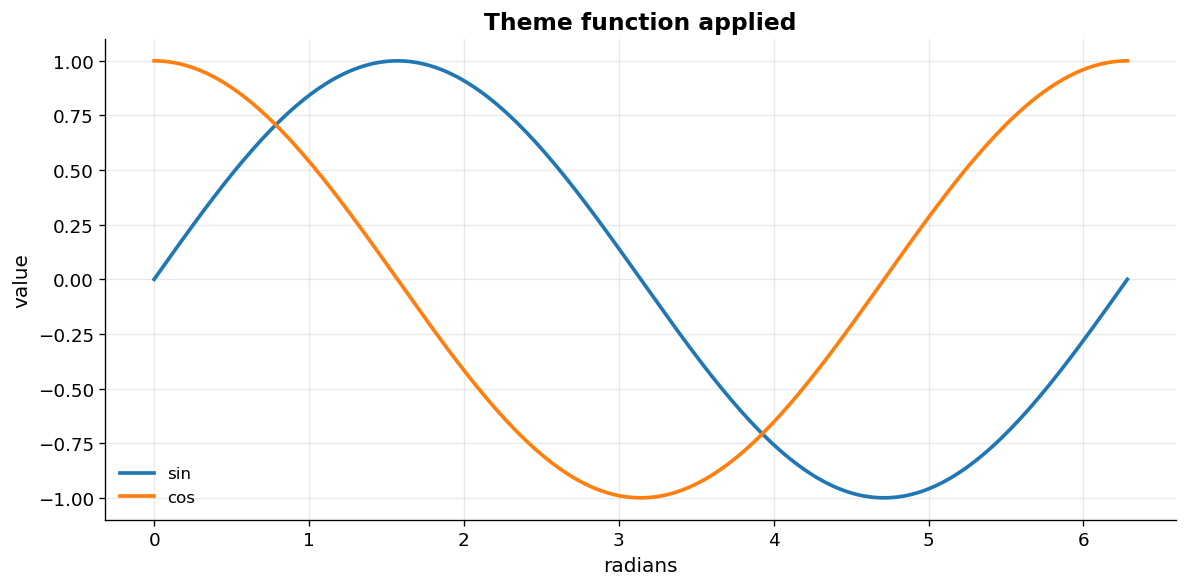

In [4]:
def set_pro_theme():
    plt.rcParams.update({
        'figure.figsize': (10, 5),
        'figure.dpi': 120,
        'savefig.dpi': 300,
        'axes.grid': True,
        'grid.alpha': 0.28,
        'grid.linestyle': '-',
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.titleweight': 'bold',
        'axes.labelsize': 12,
        'axes.titlesize': 14,
        'xtick.labelsize': 11,
        'ytick.labelsize': 11,
        'lines.linewidth': 2.2,
        'legend.frameon': False,
    })

set_pro_theme()

x = np.linspace(0, 2*np.pi, 200)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), label='sin')
ax.plot(x, np.cos(x), label='cos')
ax.set_title('Theme function applied')
ax.set_xlabel('radians')
ax.set_ylabel('value')
ax.legend()
plt.tight_layout()
plt.show()

## 4. Export Settings (Professional Output)

Good defaults for export:
```python
plt.savefig('figure.png', dpi=300, bbox_inches='tight')
plt.savefig('figure.pdf', bbox_inches='tight')  # vector
```

### Common gotchas
- Use `bbox_inches='tight'` to avoid label cropping.
- Prefer PDF/SVG for papers; PNG for web.
- Increase DPI for raster images, not vector formats.

## Practice
1. Create two themes: dark (screen) and light (print).
2. Apply theme with `rc_context` for a single figure.
3. Export the same figure as PNG and PDF.

## Quick reference
```python
plt.style.use('seaborn-v0_8')
with plt.rc_context({'axes.grid': True}): ...
plt.rcParams['lines.linewidth'] = 2
plt.savefig('out.png', dpi=300, bbox_inches='tight')
```
